In [6]:
import pandas as pd
import missingno as msno

In [2]:
a_income = pd.read_csv(r'C:\Users\Shrey\OneDrive\Desktop\data mining\adult income\adult.csv')

In [3]:
a_income.replace('?', pd.NA, inplace=True)

In [4]:
a_income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,<NA>,77053,HS-grad,9,Widowed,<NA>,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,<NA>,186061,Some-college,10,Widowed,<NA>,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
a_income.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

<AxesSubplot:>

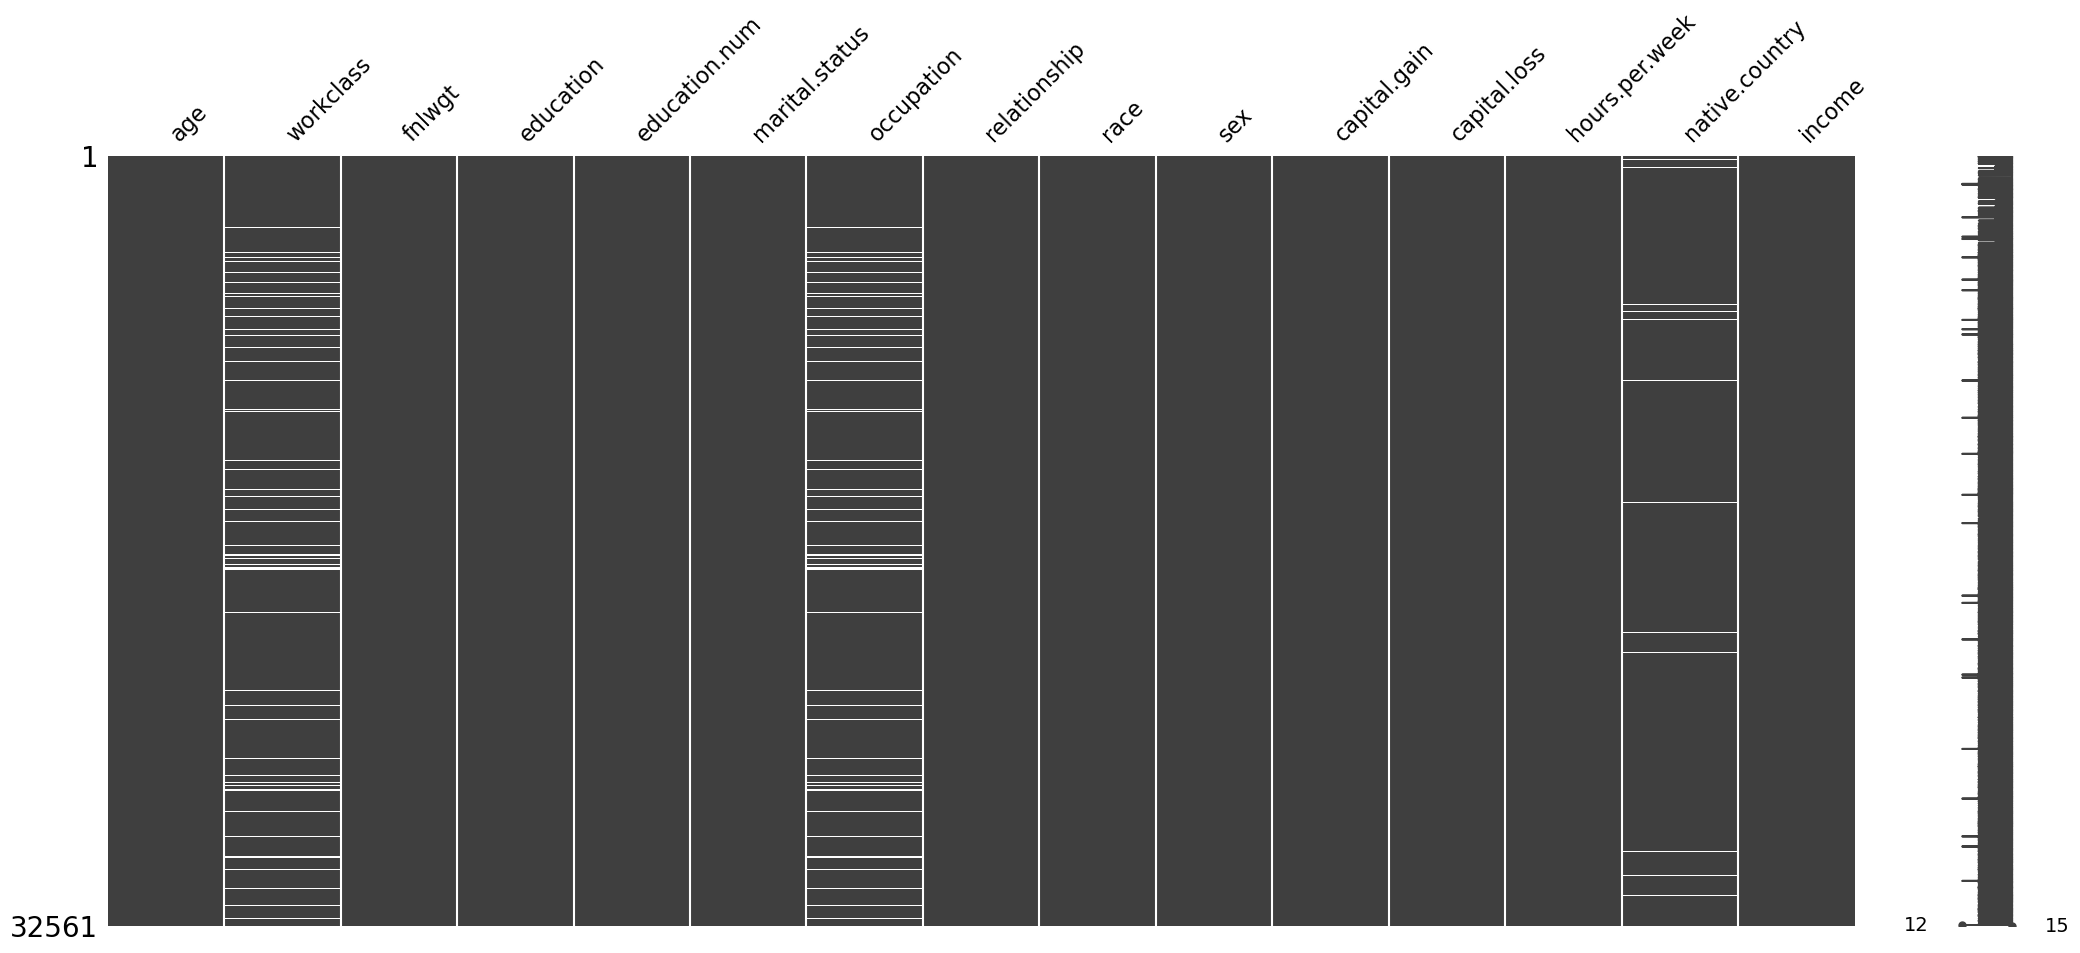

In [7]:
msno.matrix(a_income)

In [8]:
a_income['workclass'].fillna(a_income['workclass'].mode()[0], inplace=True)

In [10]:
a_income['occupation'].fillna(a_income['occupation'].mode()[0], inplace=True)
a_income['native.country'].fillna(a_income['native.country'].mode()[0], inplace=True)

<AxesSubplot:>

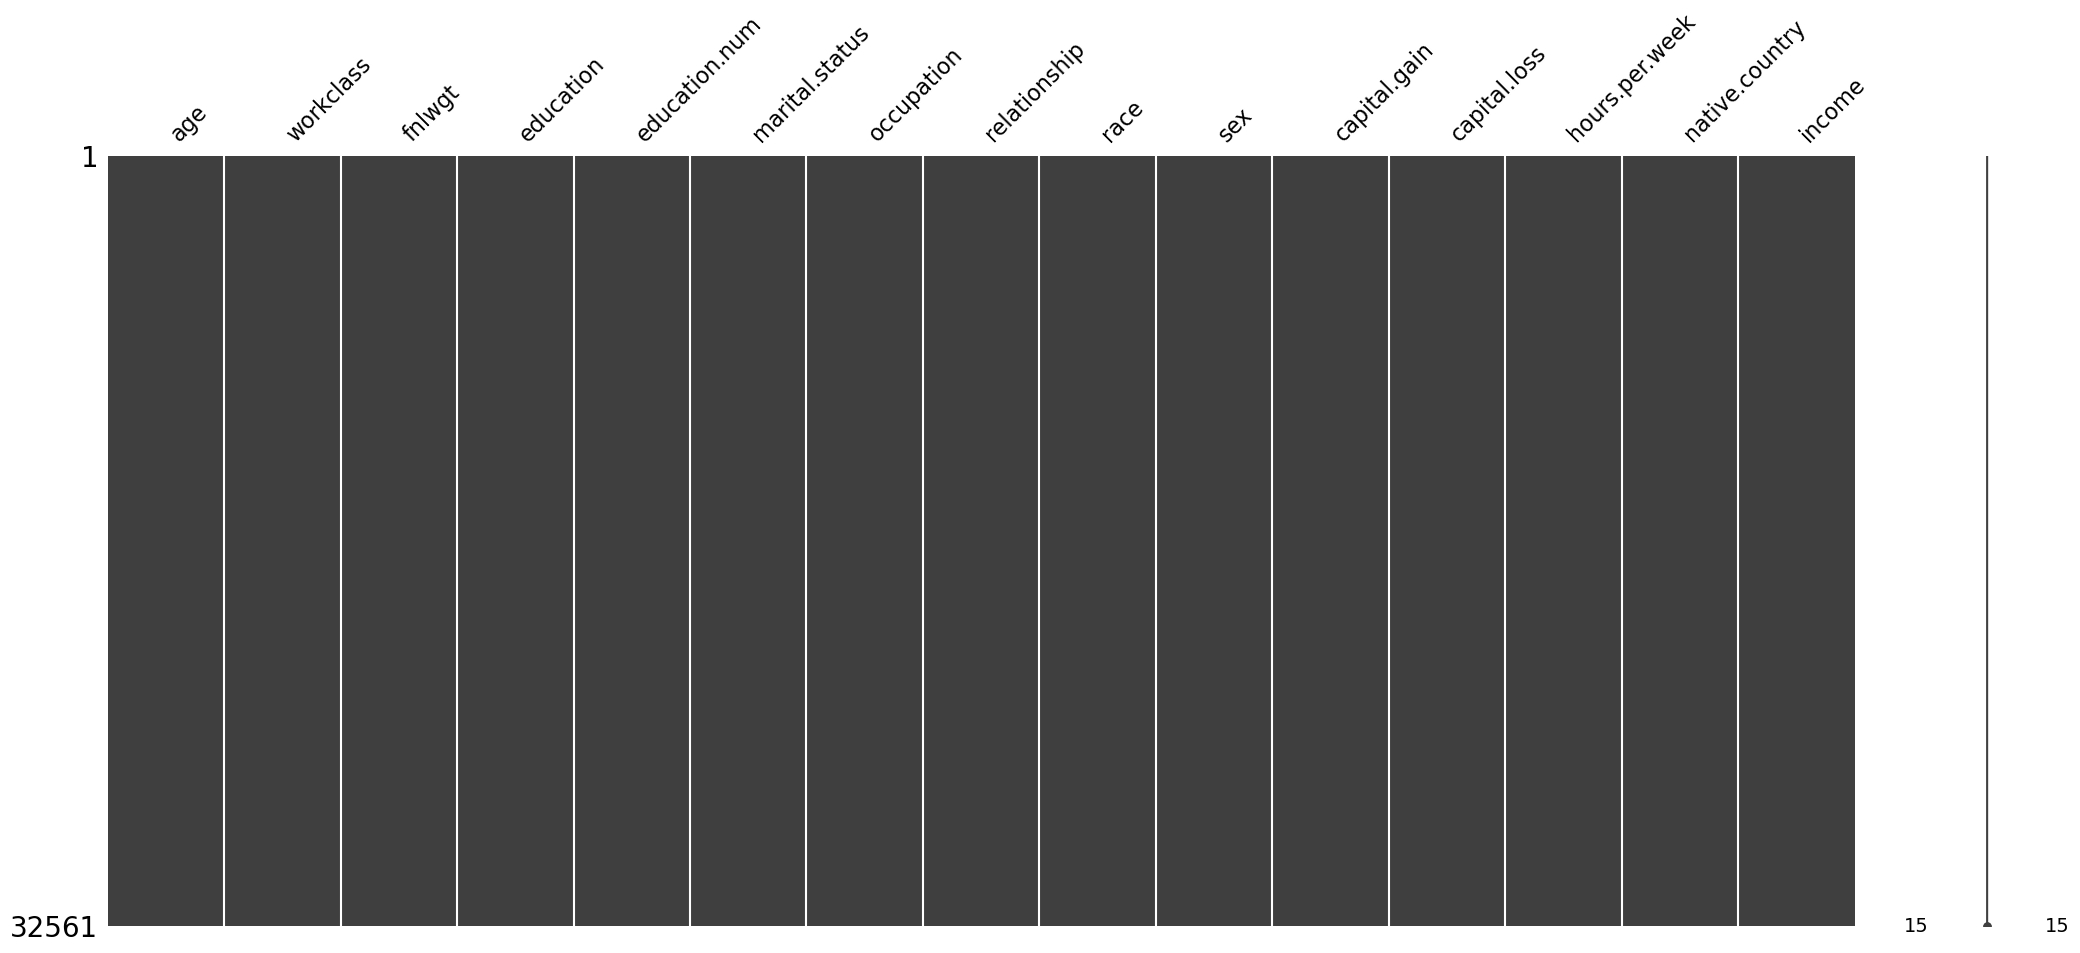

In [11]:
msno.matrix(a_income)

In [15]:
a_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
a_income = pd.get_dummies(a_income, columns=categorical_columns)

In [17]:
a_income.shape

(32561, 106)

In [19]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['age', 'fnlwgt', 'education.num', 'capital.loss', 'capital.gain', 'hours.per.week']
scaler = StandardScaler()
a_income[numerical_columns] = scaler.fit_transform(a_income[numerical_columns])

In [20]:
a_income.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
from sklearn.model_selection import train_test_split
x = a_income.drop('income', axis=1)
y = a_income['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42 )

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('accuracy :', accuracy_score(y_test, y_pred))
print('\nClassification Report :\n', classification_report(y_test,y_pred))

accuracy : 0.8473821587594043

Classification Report :
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4976
        >50K       0.72      0.58      0.64      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print('accuracy :', accuracy_score(y_test, y_pred_rf))
print('\nClassification Report:\n', classification_report(y_test,y_pred))

accuracy : 0.8519883310302472

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4976
        >50K       0.72      0.58      0.64      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



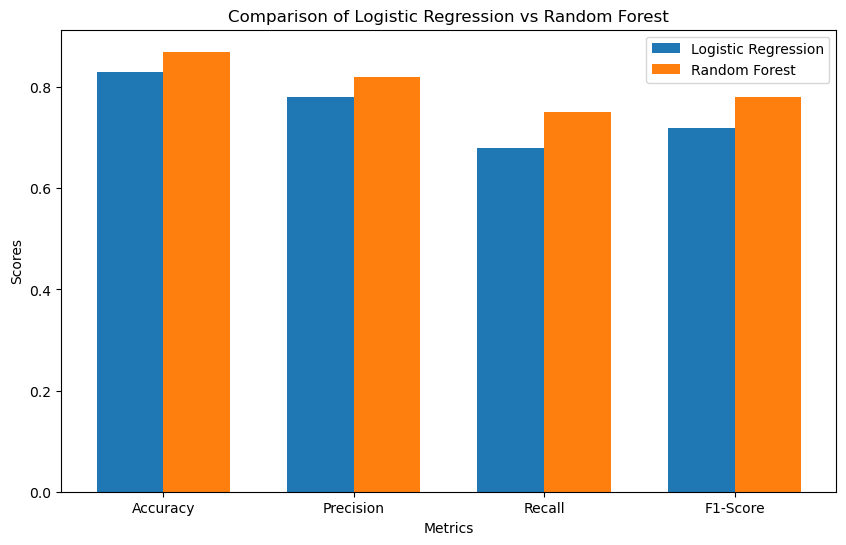

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the results from both models, we will use mock data for this example:
# Logistic Regression results
logistic_results = {'Accuracy': 0.83, 'Precision': 0.78, 'Recall': 0.68, 'F1-Score': 0.72}

# Random Forest results
random_forest_results = {'Accuracy': 0.87, 'Precision': 0.82, 'Recall': 0.75, 'F1-Score': 0.78}

# Prepare data for the bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logistic_values = [logistic_results[metric] for metric in metrics]
rf_values = [random_forest_results[metric] for metric in metrics]

# Bar plot for comparison
x = np.arange(len(metrics))  # label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, logistic_values, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()
